In [4]:
from mylab.ana.linear_track.CminiLWana import MiniLWAna
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

mouse_info_path = r"Z:\QiuShou\mouse_info\191173_info.txt"
cnmf_result_dir = r"Z:\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\Results_191173\20191110_160946_20191028-1102all"
lw_ana = MiniLWAna(mouse_info_path,cnmf_result_dir)
# lw_ana.select_in_context()
lw_ana.Idx_ContextCells

loaded info: Z:\QiuShou\mouse_info\191173_info.txt
result is loaded


{'idx_ContextCells_allblocks': {'idx_ContextACells_allblocks': [4,
   8,
   21,
   26,
   29,
   30,
   57,
   64,
   69,
   74,
   92,
   94],
  'idx_ContextBCells_allblocks': [6, 14, 15, 17, 25, 34, 42, 49, 60, 68, 87],
  'idx_Cells_no_firing': []},
 'idx_ContextCells_eachblock': {1: {'idx_ContextACells': [26],
   'idx_ContextBCells': [16, 17, 68, 83, 106],
   'idx_Cells_disapper': []},
  2: {'idx_ContextACells': [4,
    11,
    16,
    19,
    21,
    23,
    26,
    29,
    48,
    54,
    56,
    71,
    86,
    92,
    93,
    94],
   'idx_ContextBCells': [7, 17, 34, 42, 61, 68, 91, 98],
   'idx_Cells_disapper': [60, 90]},
  3: {'idx_ContextACells': [8, 11, 20, 26, 28, 44, 64, 69, 92],
   'idx_ContextBCells': [2, 6, 17, 22, 34, 42, 49, 54, 61, 68, 81, 98],
   'idx_Cells_disapper': [21, 60, 91]},
  4: {'idx_ContextACells': [2, 29, 30, 61, 69, 74],
   'idx_ContextBCells': [17, 35, 44, 57, 71, 87],
   'idx_Cells_disapper': [21, 60, 64, 105]},
  5: {'idx_ContextACells': [22, 29, 31, 

## 在所有的session中寻找 context cells（能显著区分两个context的细胞）
### 在指定的所有trial中，对每个细胞，进行Wilcoxon_unpaired_ranksumstest,看是否该细胞能够显著区分两个context
### 输出的idx_ContextCells [("A",neuron_i`d,p_value,csi)...]

### idx_ContextCells_allblocks在第一个block中的变化情况,多个细胞的平均发放率（是否有意义？）
#### 在CtxA中，idx_ContextACells 的发放趋势，idx_ContextBCells的发放趋势，其他非idx_ContexACells的发放趋势，发放趋势用线性拟合来说明；在CtxB中同样的操作
#### 在CtxA中，idx_ContextACells 对比前后半个session，其发放率是否有变化，idx_ContextBCells呢，其他非idx_ContextACells？；在CtxB中同样的分析

In [16]:
idx_ContextCells = lw_ana.Idx_ContextCells

In [235]:
stats.kendalltau


True

In [298]:
a = idx_ContextCells["idx_ContextCells_allblocks"]["idx_ContextACells_allblocks"]
b = idx_ContextCells["idx_ContextCells_allblocks"]["idx_ContextBCells_allblocks"]
c = lw_ana.neuron_ids
print(a)
print(b)
print(idx_ContextCells["idx_ContextCells_eachblock"][6])

[4, 8, 21, 26, 29, 30, 57, 64, 69, 74, 92, 94]
[6, 14, 15, 17, 25, 34, 42, 49, 60, 68, 87]
{'idx_ContextACells': [8, 17, 25, 31, 45, 57, 61, 68, 83, 87, 105, 110], 'idx_ContextBCells': [11, 18, 28, 36, 48, 51, 54, 69, 72, 93, 98], 'idx_Cells_disapper': [21, 64, 91]}


43


<BarContainer object of 3 artists>

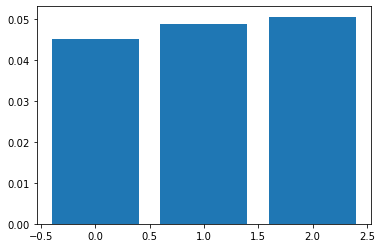

In [291]:
in_context_LoRAtrialnum_MeanFr_mssession_NormalizedByBlock = lw_ana.calculate_in_context_LoRAtrialnum_MeanFr_mssession_NormalizedByBlock().set_index(["block_num","context_order","in_context_trialnum"])

temp= in_context_LoRAtrialnum_MeanFr_mssession_NormalizedByBlock.xs((1,"A"),level=("block_num","context_order")).reset_index(["in_context_trialnum"])[c]


def generate_bin_num(every_N_trials,length):
    num = int(np.trunc(length/every_N_trials))
    last_bin_num = int(length%every_N_trials)
    bin_num = []
    for i in range(num):
        bin_num = bin_num + [i]*every_N_trials
        
    if last_bin_num:
        bin_num = bin_num + [i+1]*last_bin_num
    return bin_num

print(temp.shape[0])

temp["temp_bin_num"] = generate_bin_num(20,temp.shape[0])
temp

temp = temp.groupby(["temp_bin_num"]).mean()
temp

x = temp.index
y_mean = temp.mean(axis=1)
y_std = temp.std(axis=1)
list(x)

plt.bar(x,y_mean)
# sns.regplot(list(x),y_mean.values)

In [171]:
plt.errorbar?

In [134]:
temp

,2,4,5
temp_bin_num,,,
0,0.008833,0.014851,0.009988
1,0.056974,0.065539,0.008561
2,0.000000,0.003451,0.000000
3,0.000000,0.000000,0.000000
4,0.195176,0.000000,0.000000
5,0.236695,0.046379,0.058165
6,0.000000,0.016685,0.216615
7,0.000000,0.000148,0.000000
8,0.102026,0.144895,0.000000


In [126]:
temp

,2,4,5,temp_bin_num
temp_bin_num,,,,
0,0.008833,0.014851,0.009988,0
1,0.056974,0.065539,0.008561,0
2,0.000000,0.003451,0.000000,0
3,0.000000,0.000000,0.000000,0
4,0.195176,0.000000,0.000000,0
5,0.236695,0.046379,0.058165,1
6,0.000000,0.016685,0.216615,1
7,0.000000,0.000148,0.000000,1
8,0.102026,0.144895,0.000000,1


In [119]:
set(temp["temp_bin_num"]).values

AttributeError: 'set' object has no attribute 'values'

In [58]:
import pandas as pd
import numpy as np
pd.DataFrame.groupby?

Text(0.5, 1.0, 'idx_ContextCells @ CtxB in 1st session ')

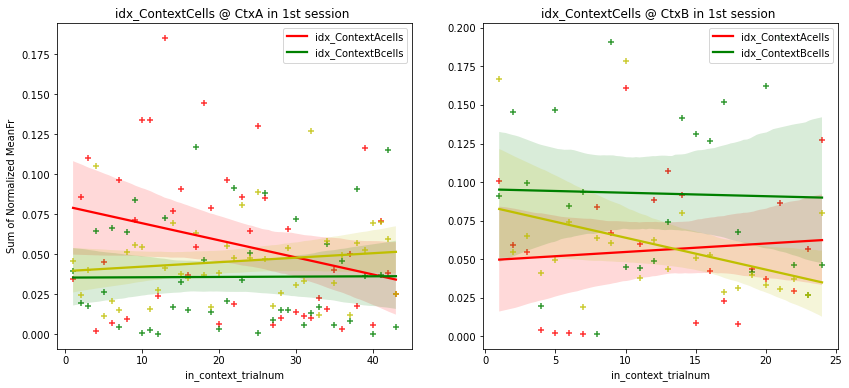

In [19]:
idx_ContextACells= idx_ContextCells["idx_ContextCells_allblocks"]["idx_ContextACells_allblocks"]
idx_ExcludeContextACells = lw_ana.neuron_ids.difference(idx_ContextACells)
idx_ContextBCells= idx_ContextCells["idx_ContextCells_allblocks"]["idx_ContextBCells_allblocks"]
idx_ExcludeContextBCells = lw_ana.neuron_ids.difference(idx_ContextBCells)

temp = in_context_LoRAtrialnum_MeanFr_mssession_NormalizedByBlock.set_index(["block_num","context_order"])
 
block_num = 1
session_CtxA = temp.xs((block_num,"A"),level=("block_num","context_order"))
session_CtxB = temp.xs((block_num,"B"),level=("block_num","context_order"))

# <!-- for row in session_CtxA.iterrows():
#     y = row[1].loc[idx_ContextACells]
#     x = [row[1]["in_context_trialnum"]]*len(y)
#     plt.scatter(x,y,c="r",s=1) -->
    
plt.figure(figsize=(14,6))
#@contextA session
plt.subplot(121)
sns.regplot(session_CtxA["in_context_trialnum"],session_CtxA[idx_ContextACells].mean(axis=1)
            ,fit_reg=True,marker="+"
            ,color="r"
            ,scatter_kws={"s": 40,"color":"r"}
           ,truncate=True)
sns.regplot(session_CtxA["in_context_trialnum"],session_CtxA[idx_ContextBCells].mean(axis=1)
            ,fit_reg=True,marker="+"
            ,color="g"
            ,scatter_kws={"s": 40,"color":"g"}
           ,truncate=True)
sns.regplot(session_CtxA["in_context_trialnum"],session_CtxA[idx_ExcludeContextACells].mean(axis=1)
            ,fit_reg=True,marker="+"
            ,color="y"
            ,scatter_kws={"s": 40,"color":"y"}
           ,truncate=True)

corr_gust_A = session_CtxA[idx_ContextACells].mean(axis=1).corr(session_CtxA["in_context_trialnum"])
corr_gust_B = session_CtxA[idx_ContextBCells].mean(axis=1).corr(session_CtxA["in_context_trialnum"])
plt.legend(["idx_ContextAcells","idx_ContextBcells"])
plt.title("idx_ContextCells @ CtxA in 1st session ")
plt.ylabel("Sum of Normalized MeanFr")
#@contextBsession
plt.subplot(122)
sns.regplot(session_CtxB["in_context_trialnum"],session_CtxB[idx_ContextACells].mean(axis=1)
            ,fit_reg=True,marker="+"
            ,color="r"
            ,scatter_kws={"s": 40,"color":"r"}
           ,truncate=True)
sns.regplot(session_CtxB["in_context_trialnum"],session_CtxB[idx_ContextBCells].mean(axis=1)
            ,fit_reg=True,marker="+"
            ,color="g"
            ,scatter_kws={"s": 40,"color":"g"}
           ,truncate=True)
sns.regplot(session_CtxB["in_context_trialnum"],session_CtxB[idx_ExcludeContextBCells].mean(axis=1)
            ,fit_reg=True,marker="+"
            ,color="y"
            ,scatter_kws={"s": 40,"color":"y"}
           ,truncate=True)

plt.legend(["idx_ContextAcells","idx_ContextBcells"])
plt.title("idx_ContextCells @ CtxB in 1st session ")
##emergency and maintaince

In [291]:
A_90_1 = temp[];mean_A_90_1 = np.mean(A_90_1);std_A_90_1 = np.std(A_90_1);
# A_90_3 = temp.loc[("90","A","3")];mean_A_90_3 = np.mean(A_90_3);std_A_90_3 = np.std(A_90_3);
# A_90_5 = temp.loc[("90","A","5")];mean_A_90_5 = np.mean(A_90_5);std_A_90_5 = np.std(A_90_5);


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: shape mismatch: objects cannot be broadcast to a single shape

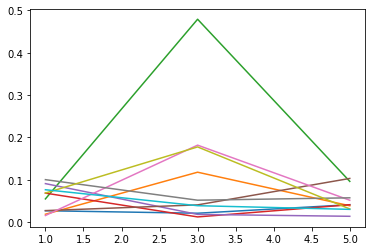

In [292]:

plt.scatter([1]*len(A_90_1),A_90_1,c="black",s=1)
plt.scatter([3]*len(A_90_1),A_90_3,c="black",s=1)
plt.scatter([5]*len(A_90_1),A_90_5,c="black",s=1)
plt.plot([1,3,5],[mean_A_90_1,mean_A_90_3,mean_A_90_5])
plt.errorbar([1,3,5],[mean_A_90_1,mean_A_90_3,mean_A_90_5],yerr=[std_A_90_1,std_A_90_3,std_A_90_5])

In [133]:
Wilcoxon_unpaired_ranksumstest(A_90_3,A_90_5)

RanksumsResult(statistic=1.4565070557783129, pvalue=0.14525250054794853)

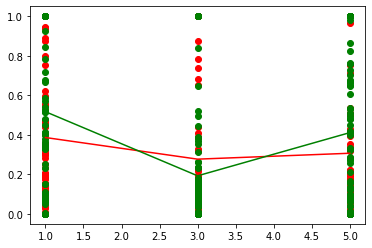

In [22]:
y_A1 = temp.loc[(90,"A"，1)]
y_A3 = temp_normalized.loc[(3,"A")]
y_A5 = temp_normalized.loc[(5,"A")]
y_B1 = temp_normalized.loc[(1,"B")]
y_B3 = temp_normalized.loc[(3,"B")]
y_B5 = temp_normalized.loc[(5,"B")]
plt.scatter([1]*len(y_A1),y_A1,c="red")
plt.scatter([3]*len(y_A3),y_A3,c="red")
plt.scatter([5]*len(y_A5),y_A5,c="red")
plt.scatter([1]*len(y_B1),y_B1,c="green")
plt.scatter([3]*len(y_B3),y_B3,c="green")
plt.scatter([5]*len(y_B5),y_B5,c="green")
plt.plot([1,3,5],[y_A1.mean(),y_A3.mean(),y_A5.mean()],"r-")
plt.plot([1,3,5],[y_B1.mean(),y_B3.mean(),y_B5.mean()],"g-")

In [23]:
in_context_LoRAtrialnum_MeanFr_msblock

,in_context_trialnum,2,4,5,6,7,8,11,14,15,...,93,94,96,97,98,105,106,107,110,in_context_LoRs
0,1,0.000000,28.889632,0.0,3.405269,0.000000,3.729616,0.0,0.028345,0.949241,...,1.225087,26.861597,1.876675,0.000000,0.000000,26.147386,0.124886,0.000000,0.000000,right
1,2,0.000000,2.664138,0.0,1.489960,1.018018,2.267486,0.0,0.000000,0.000000,...,2.847957,0.006049,0.000000,0.000000,0.000000,2.055300,5.756104,28.484312,0.000000,left
2,3,3.143592,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.568864,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.988501,0.000000,0.000000,0.000000,right
3,4,0.000000,6.172493,0.0,10.623332,0.000000,0.000000,0.0,0.544789,0.000000,...,0.000000,0.000000,0.555909,0.000000,0.000000,0.204973,0.000000,0.000000,6.893395,left
4,5,10.332478,0.092506,0.0,1.018697,0.215561,0.000000,0.0,0.176876,0.000000,...,28.980779,0.000000,0.000000,0.368898,2.010062,0.705830,0.000000,0.000000,1.136379,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,6.710472,1.827541,0.0,2.035182,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.082181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,left
58,59,0.006077,0.121611,0.0,2.146274,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.006862,0.000000,0.000000,0.000000,0.081009,0.000000,0.000000,right
59,60,3.159442,0.009100,0.0,11.316043,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.003634,0.000000,0.000000,0.000000,1.207437,0.000000,0.000000,left
60,61,2.552797,0.530036,0.0,3.291699,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,7.369043,0.000000,0.000000,0.000000,25.216020,9.546198,0.000000,right


In [ ]:
ctxA_trials = in_context_LoRAtrialnum_MeanFr_msblock_concat["context_order"].isin(["A"])
ctxB_trials = in_context_LoRAtrialnum_MeanFr_msblock_concat["context_order"].isin(["B"])
\
Wilcoxon_test(in_context_LoRAtrialnum_MeanFr_msblock_concat[2].loc[ctxA_trials],in_context_LoRAtrialnum_MeanFr_msblock_concat[2].loc[ctxA_trials])

In [ ]:
in_context_LoRAtrialnum_MeanFr_msblock_concat[2].loc[ctxB_trials]

In [ ]:
in_context_LoRAtrialnum_MeanFr_msblock_concat[2].loc[ctxA_trials]